# Projet 9: Produisez une étude de marché avec R ou Python

## Objectifs de la présentation 

## Mission 1: Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter des poulets.
### 1. La préparation, le nettoyage et l’analyse exploratoire des données. 
### 2. Tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation.
### 3. Utiliser la méthode des K-Means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering, analyser les centroïdes des classes. 

## Mission 2: Approfondir l'étude de marché. 
### 1. Réaliser une ACP afin de visualiser les résultats d'analyse, 
### 2. Comprendre les groupes, les liens entre les variables, et les liens entre les individus.


# Mission 1: Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter des poulets.


## 1. Pour passer à la partie visualisation, commencez par séparer et scaler des données

In [172]:
#Importer the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [173]:
pd.set_option("display.max_columns",None)
pd.DataFrame.iteritems = pd.DataFrame.items

In [174]:
#Importation de fichier 'df_zwo_volaille' en CSV et renommer 'df_volaille'
df_volaille = pd.read_csv('df_zwo_volaille.csv')
df_volaille

,Unnamed: 0,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
0,0,Afghanistan,0.54,5.700000e+07,0.0,29000000.0,2000000.0,0.0,37171921.0
1,1,Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,83000000.0,0.0,57792518.0
2,2,Albanie,6.26,4.700000e+07,0.0,38000000.0,0.0,4000000.0,2882740.0
3,3,Algérie,1.97,2.770000e+08,0.0,2000000.0,13000000.0,0.0,42228408.0
4,4,Angola,3.60,3.190000e+08,0.0,277000000.0,2000000.0,0.0,30809787.0
...,...,...,...,...,...,...,...,...,...
154,154,Égypte,4.51,1.250000e+09,1000000.0,110000000.0,0.0,-23000000.0,98423598.0
155,155,Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,0.0,-26000000.0,9630959.0
156,156,Équateur,6.15,3.410000e+08,0.0,0.0,17000000.0,-1000000.0,17084358.0
157,157,Éthiopie,0.04,1.400000e+07,0.0,1000000.0,1000000.0,0.0,109224414.0


In [175]:
#Utiliser la colonne 'Unnamed: 0' comme la colonne d'index
df_volaille = pd.read_csv('df_zwo_volaille.csv', delimiter=',', index_col='Unnamed: 0')
df_volaille

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
0,Afghanistan,0.54,5.700000e+07,0.0,29000000.0,2000000.0,0.0,37171921.0
1,Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,83000000.0,0.0,57792518.0
2,Albanie,6.26,4.700000e+07,0.0,38000000.0,0.0,4000000.0,2882740.0
3,Algérie,1.97,2.770000e+08,0.0,2000000.0,13000000.0,0.0,42228408.0
4,Angola,3.60,3.190000e+08,0.0,277000000.0,2000000.0,0.0,30809787.0
...,...,...,...,...,...,...,...,...
154,Égypte,4.51,1.250000e+09,1000000.0,110000000.0,0.0,-23000000.0,98423598.0
155,Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,0.0,-26000000.0,9630959.0
156,Équateur,6.15,3.410000e+08,0.0,0.0,17000000.0,-1000000.0,17084358.0
157,Éthiopie,0.04,1.400000e+07,0.0,1000000.0,1000000.0,0.0,109224414.0


In [176]:
#Mettre la colonne 'Zone' en index
df=df_volaille.set_index('Zone')
df

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
Zone,,,,,,,
Afghanistan,0.54,5.700000e+07,0.0,29000000.0,2000000.0,0.0,37171921.0
Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,83000000.0,0.0,57792518.0
Albanie,6.26,4.700000e+07,0.0,38000000.0,0.0,4000000.0,2882740.0
Algérie,1.97,2.770000e+08,0.0,2000000.0,13000000.0,0.0,42228408.0
Angola,3.60,3.190000e+08,0.0,277000000.0,2000000.0,0.0,30809787.0
...,...,...,...,...,...,...,...
Égypte,4.51,1.250000e+09,1000000.0,110000000.0,0.0,-23000000.0,98423598.0
Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,0.0,-26000000.0,9630959.0
Équateur,6.15,3.410000e+08,0.0,0.0,17000000.0,-1000000.0,17084358.0


In [177]:
#Séparer des données d'une côté X 
X = df.values

In [178]:
#Vérifier si le X est bien un np.array
type(X)

numpy.ndarray

In [179]:
#Enregistrer les colonnes dans une variable 'features'
features = df.columns
features

Index(['Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Pertes', 'Variation de stock',
       'Population'],
      dtype='object')

In [180]:
#Enregistrer les lignes dans une variable 'Zone'
Zone = df.index
Zone

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Argentine', 'Arménie', 'Australie', 'Autriche',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=159)

### Données centrées réduites (Scaling) 

In [181]:
#Commencer par scaler des données, instancier
scaler = StandardScaler() 

In [182]:
#Standardisation des données 
X_standardized = scaler.fit_transform(X) 

In [183]:
#Créer une scalée version de dataframe
X_standardized

array([[-1.21761979, -0.44830899, -0.28341675, ..., -0.23136065,
        -0.30696694,  0.36479768],
       [ 1.51066337,  2.94697189,  0.08774099, ...,  4.0132175 ,
        -0.30696694,  0.89300818],
       [-0.06759918, -0.46478294, -0.28341675, ..., -0.33616505,
        -0.19239477, -0.51354281],
       ...,
       [-0.08971496,  0.01955116, -0.28341675, ...,  0.55467234,
        -0.33560998, -0.14975879],
       [-1.31814607, -0.51914697, -0.28341675, ..., -0.28376285,
        -0.30696694,  2.21047087],
       [-1.02259881, -0.53726832, -0.28341675, ..., -0.33616505,
        -0.22103781, -0.57066277]])

In [184]:
#Données réduites et centrées
X_scaled = pd.DataFrame(data = X_standardized,columns=df.columns,index=df.index)
X_scaled

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
Zone,,,,,,,
Afghanistan,-1.217620,-0.448309,-0.283417,-0.280883,-0.231361,-0.306967,0.364798
Afrique du Sud,1.510663,2.946972,0.087741,4.356297,4.013217,-0.306967,0.893008
Albanie,-0.067599,-0.464783,-0.283417,-0.194832,-0.336165,-0.192395,-0.513543
Algérie,-0.930115,-0.085882,-0.283417,-0.539035,0.345064,-0.306967,0.494323
Angola,-0.602399,-0.016692,-0.283417,2.090294,-0.231361,-0.306967,0.201827
...,...,...,...,...,...,...,...
Égypte,-0.419441,1.517033,-0.277525,0.493574,-0.336165,-0.965757,1.933801
Émirats arabes unis,1.649390,0.136516,0.270374,3.581840,-0.336165,-1.051686,-0.340683
Équateur,-0.089715,0.019551,-0.283417,-0.558157,0.554672,-0.335610,-0.149759


In [185]:
#Pour avoir une moyenne à 0 et écart type à 1
idx=["mean","std"]
print(idx)

['mean', 'std']


In [186]:
#Mettre en dataframe
pd.DataFrame(X_standardized).describe().round(2).loc[idx,:]

,0,1,2,3,4,5,6
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 2. La Classification Ascendante Hiérarchique (CAH) avec un dendrogramme comme visualisation.
Cette arborescence, est un dendrogramme qui regroupe les différents clusters par un clustering agglomératif.

In [187]:
#Importer les packages de la classification ascendante hiérarchique
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster. hierarchy as sch
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [188]:
#Calculer les distances en spécifiant la méthode à utiliser:
z=linkage(X_standardized, method="ward")
z[:10]

array([[1.03000000e+02, 1.30000000e+02, 3.14792412e-02, 2.00000000e+00],
       [1.30000000e+01, 5.10000000e+01, 6.07747901e-02, 2.00000000e+00],
       [1.80000000e+01, 3.80000000e+01, 6.39597031e-02, 2.00000000e+00],
       [5.60000000e+01, 6.50000000e+01, 7.13390087e-02, 2.00000000e+00],
       [1.22000000e+02, 1.23000000e+02, 7.34261502e-02, 2.00000000e+00],
       [9.00000000e+01, 1.15000000e+02, 8.22147915e-02, 2.00000000e+00],
       [1.35000000e+02, 1.53000000e+02, 8.58523040e-02, 2.00000000e+00],
       [3.60000000e+01, 8.10000000e+01, 9.71227912e-02, 2.00000000e+00],
       [9.60000000e+01, 1.20000000e+02, 9.81724243e-02, 2.00000000e+00],
       [7.60000000e+01, 1.26000000e+02, 1.00666349e-01, 2.00000000e+00]])

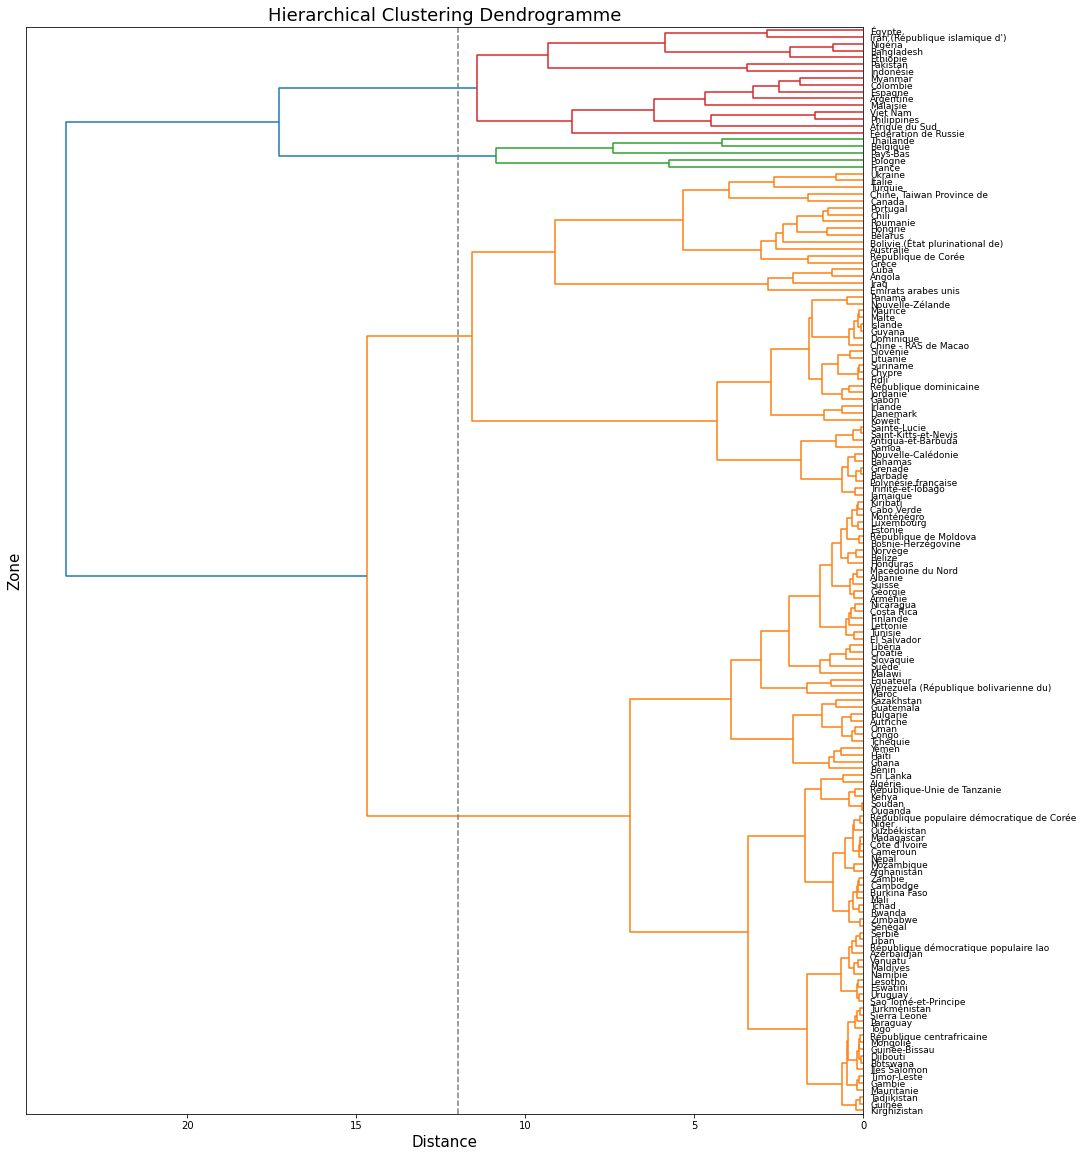

In [189]:
#Dendrogramme
plt.rcParams.update({'font.size':15})
fig,ax=plt.subplots(1,1,figsize=(15,20))
_=dendrogram(z,ax=ax,labels=Zone,orientation="left")
plt.title('Hierarchical Clustering Dendrogramme')
ax.set_xlabel("Distance")
ax.set_ylabel("Zone")
ax.tick_params(axis='x', which ='major',labelsize=10)
ax.tick_params(axis='y',which='major',labelsize=9)
plt.axvline(x=12,ymin=0, ymax=1, color='grey',ls='--')
plt.show()

In [190]:
#Utiliser AgglomerativeClustering pour déterminer les contenus des clusters.
agg_clustering = AgglomerativeClustering(n_clusters=4)
#Appliquer l'algorithme sur des données
agg_clustering.fit(X_scaled)

AgglomerativeClustering(n_clusters=4)

In [191]:
#Mettre des données dans clusters
X_scaled['label'] = agg_clustering.labels_

In [192]:
#Afficher le dataframe
X_scaled

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population,label
Zone,,,,,,,,
Afghanistan,-1.217620,-0.448309,-0.283417,-0.280883,-0.231361,-0.306967,0.364798,3
Afrique du Sud,1.510663,2.946972,0.087741,4.356297,4.013217,-0.306967,0.893008,1
Albanie,-0.067599,-0.464783,-0.283417,-0.194832,-0.336165,-0.192395,-0.513543,3
Algérie,-0.930115,-0.085882,-0.283417,-0.539035,0.345064,-0.306967,0.494323,3
Angola,-0.602399,-0.016692,-0.283417,2.090294,-0.231361,-0.306967,0.201827,0
...,...,...,...,...,...,...,...,...
Égypte,-0.419441,1.517033,-0.277525,0.493574,-0.336165,-0.965757,1.933801,1
Émirats arabes unis,1.649390,0.136516,0.270374,3.581840,-0.336165,-1.051686,-0.340683,0
Équateur,-0.089715,0.019551,-0.283417,-0.558157,0.554672,-0.335610,-0.149759,3


### Les listes des 4 groupes sélectionnés par un dendrogramme

In [193]:
#Imprimer les noms des clusters, boucle à travers les clusters de 0 à 4
for i in range (4):
    print(f'Cluster {i}')
    # Sélectionner les index du DataFrame 'X_scaled' où la colonne 'label' est égale à 'i' et les imprime sous forme de liste
    print(X_scaled[X_scaled.label == i].index.tolist())
    print() # Imprimer une ligne vide pour la lisibilité

Cluster 0
['Angola', 'Antigua-et-Barbuda', 'Australie', 'Bahamas', 'Barbade', 'Bolivie (État plurinational de)', 'Bélarus', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre', 'Cuba', 'Danemark', 'Dominique', 'Fidji', 'Gabon', 'Grenade', 'Grèce', 'Guyana', 'Hongrie', 'Iraq', 'Irlande', 'Islande', 'Italie', 'Jamaïque', 'Jordanie', 'Koweït', 'Lituanie', 'Malte', 'Maurice', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama', 'Polynésie française', 'Portugal', 'Roumanie', 'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Samoa', 'Slovénie', 'Suriname', 'Trinité-et-Tobago', 'Turquie', 'Ukraine', 'Émirats arabes unis']

Cluster 1
['Afrique du Sud', 'Argentine', 'Bangladesh', 'Colombie', 'Espagne', 'Fédération de Russie', 'Indonésie', "Iran (République islamique d')", 'Malaisie', 'Myanmar', 'Nigéria', 'Pakistan', 'Philippines', 'Viet Nam', 'Égypte', 'Éthiopie']

Cluster 2
['Belgique', 'France', 'Pays-Bas', 'Pologne', 'Thaïl

### Evaluer un algorithme de clustering avec l'indice Davies-Bouldin et le cofficient de silhouette

### L' indice Davies-Bouldin :  

In [194]:
##Importer des relevantes librairies
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition, preprocessing, metrics

In [195]:
#Transformer des données en composantes principales
acp = PCA(svd_solver='full')
coord = acp.fit_transform(X_standardized)
n_clusters=4

0.636490622045618


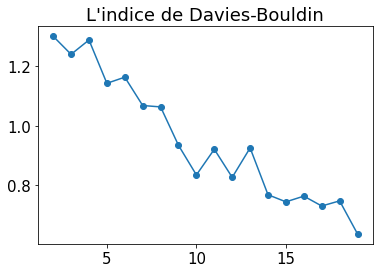

In [196]:
#Déterminer d'indice Davies Bouldin
DB=[]
test_clusters = [i for i in range(2,20)]
for num_clusters in test_clusters:
    cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++') #Les deux options à la fin pour avoir une initialisation aléatoire et unique
    cls.fit(coord)
    
    db = metrics.davies_bouldin_score(coord,cls.labels_)
    DB.append(db)

print(min(DB))
plt.plot(test_clusters,DB,marker='o')   
plt.title("L'indice de Davies-Bouldin")#Choisir les scores les plus hauts
plt.show()

### Le coefficient de silhouette

In [197]:
#Transformer des données en composantes principales
coord = acp.fit_transform(X_standardized)
n_clusters=4

Max score : 0.61


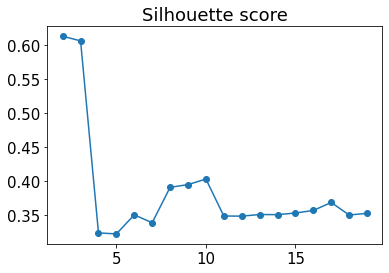

In [198]:
#Déterminer du score de silhouette
silhouettes=[]
test_clusters = [i for i in range(2,20)]
for num_clusters in test_clusters:
    cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++') #Les deux options à la fin pour avoir une initialisation aléatoire et unique
    cls.fit(coord)
    silh = metrics.silhouette_score(coord,cls.labels_)
    silhouettes.append(silh)

print("Max score : {:.2}".format(max(silhouettes)))
plt.plot(test_clusters,silhouettes,marker='o')#Choisir les scores les plus hauts
plt.title('Silhouette score')
plt.show()

## 3. Regroupement avec la méthode des K-moyennes
L’ algorithme du k-means ou l’algorithme des centres mobiles trouve combien des groups en faisant en sorte de minimiser l’inertie intraclasse.

In [199]:
#Importer des relevantes librairies
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [200]:
#D'abord, définir une liste vide pour stocker des inerties
inertia=[]
#Définir la liste des nombres de clusters à tester
k_list=range(1,10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [201]:
#Pour chaque valeur de k, entrainer un kmeans specifique et stocker son inertie
for k in k_list:
    kmeans=KMeans(n_clusters=k) #instancier un KMeans pour k clusters
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [202]:
#Afficher une liste d'inerties
print(inertia)

[6.540138355846517e+19, 2.1544114824931086e+19, 1.2646404282913743e+19, 9.023056609638547e+18, 6.441206629237338e+18, 4.90679165715337e+18, 4.0256313452612275e+18, 3.3245815505318344e+18, 2.8044160909879224e+18]


### Choisir le nombres de k-moyennes avec la méthode de coude

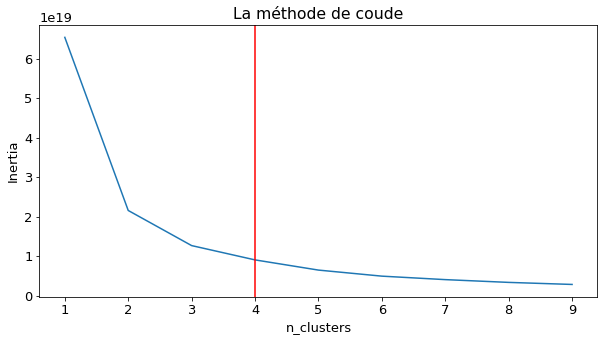

In [203]:
#Faire un graphique pour constater la "cassure" dans la courbe
plt.rcParams.update({'font.size':13})
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.set_ylabel("Inertia")
ax.set_xlabel("n_clusters")
plt.title("La méthode de coude")
ax=plt.plot(k_list,inertia)
plt.axvline(x=4,ymin=0, ymax=1, color="red")
plt.show() #Afficher le résultat

### Tester les k-moyennes 5, 4 et 3

In [204]:
#Effectuer un clustering avec kmeans aux 5 clusters 
#instancier notre estimateur
kmeans = KMeans(n_clusters=5)
#Entrainer
kmeans.fit(X)
KMeans(n_clusters = 5)
#Calculer son inertie
kmeans.inertia_

6.441206629237338e+18

In [205]:
#Effectuer un clustering avec kmeans aux 4 clusters, 
#instancier notre estimateur
kmeans = KMeans(n_clusters=4)
#Entrainer
kmeans.fit(X)
KMeans(n_clusters = 4)
#Calculer son inertie
kmeans.inertia_

9.023056609638547e+18

In [206]:
#Effectuer un clustering avec KMeans aux 3 clusters, 
#instancier notre estimateur
kmeans = KMeans(n_clusters=3)
#Entrainer
kmeans.fit(X)
KMeans(n_clusters = 3)
#Calculer son inertie
kmeans.inertia_

1.2646404282913743e+19

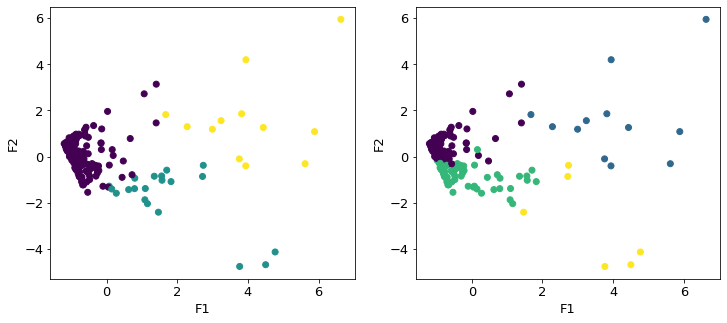

In [207]:
#Importer des relevantes librairies
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

#Instancier l'ACP
pca = PCA()
pca.fit(X_standardized)
#Transformer le nombre de composantes principales souhaitées 
Z = pca.transform(X_standardized)

#Regarder les clusters obtenus avec kmeans aux 3 et 4 clusters
fig = plt.figure(figsize=(12,5))

cls = KMeans(n_clusters=3)
cls.fit(X_standardized)
ax = fig.add_subplot(121)
ax.scatter(Z[:,0], Z[:,1], c=cls.labels_)
ax.set_xlabel('F1')
ax.set_ylabel('F2')

cls4 = KMeans(n_clusters=4)
cls4.fit(X_standardized)
ax = fig.add_subplot(122)
ax.scatter(Z[:,0], Z[:,1], c=cls4.labels_)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
plt.show()

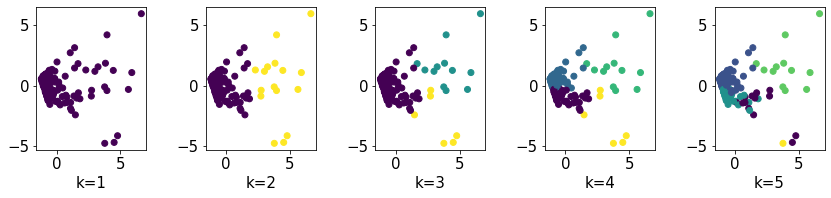

In [267]:
#Importer la relevante librairie
from sklearn.datasets import make_blobs

#Creation des ensembles de données regroupés
reference = Z
plt.figure(figsize=(12, 3))
for k in range(1,6):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(reference)
    plt.subplot(1,5,k)
    plt.scatter(reference[:, 0], reference[:, 1], c=a)
    plt.xlabel('k='+str(k))
plt.tight_layout()
plt.show()

### Centroïds
Les centroids sont les centres de gravité des groupes que les placer aléatoirement dans l’espace.
Le chaque point de nuage et associe au cluster du centröides plus proche; une fois les centröides sont placés, le centre de gravité de chaque groupe est calculé pour l'associer au bon cluster.

In [209]:
#Regardons maintenant les clusters que nous avons obtenus.
kmeans = KMeans(n_clusters = 4, random_state = 0)

#D'abord ré-entrainer un estimateur:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [210]:
#Les clusters (0,1,2,et 3) à considérer comme des variables catégorielles cardinales, 
#il n'y a pas d'ordre entre les clusters
kmeans.labels_

array([1, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 0, 1, 1,
       3, 1, 2, 0, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 3, 1, 1, 1, 1, 0, 3, 1, 2, 0,
       2, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 0, 1, 1, 1,
       0, 3, 1, 1, 1], dtype=int32)

In [211]:
#Choisir les nombres des composantes principales
pca=decomposition.PCA(n_components=2)

In [212]:
#Instancier
pca.fit(X_standardized)

PCA(n_components=2)

In [213]:
#Transformer le nombre de composantes principales souhaitées 
Z = pca.transform(X_standardized)

In [214]:
#Déterminer des valeurs des centroides
centroids = kmeans.cluster_centers_
centroids = centroids[:, :-1]
print(centroids)

[[ 0.16347722  2.23826261 -0.01005613  0.56432694  2.31189276 -0.30887648
   2.22871456]
 [-0.60136057 -0.3908312  -0.26011014 -0.30588883 -0.2509395  -0.20781795
  -0.24153377]
 [ 0.19779019  1.05246776  4.45424497  1.85126369  0.17912324  1.66462911
   0.62176924]
 [ 1.08691303 -0.09198098 -0.0618001   0.17581697 -0.27484333  0.28844268
  -0.32301618]]


In [215]:
#Scaler et transformer des centroïdes 
centroids_scaled = scaler.fit_transform(centroids)
print(centroids_scaled)

[[-0.08067186  1.48041246 -0.52587079 -0.00880868  1.7070237  -0.84883954
   1.61535656]
 [-1.36003684 -1.05306808 -0.65223332 -1.09568236 -0.69594935 -0.72041705
  -0.7924741 ]
 [-0.02327563  0.33774187  1.73012325  1.59853715 -0.2927122   1.65903884
   0.04901517]
 [ 1.46398432 -0.76508626 -0.55201914 -0.49404611 -0.71836215 -0.08978226
  -0.87189763]]


In [216]:
#Projeter des centröides en utilisant l'ACP déjà entrainé
centroids_projected = pca.transform(centroids_scaled)
print(centroids_projected )

[[ 2.00158176  1.98947267]
 [-2.17917918  0.91687079]
 [ 1.47679794 -1.95708616]
 [-1.29920052 -0.9492573 ]]


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

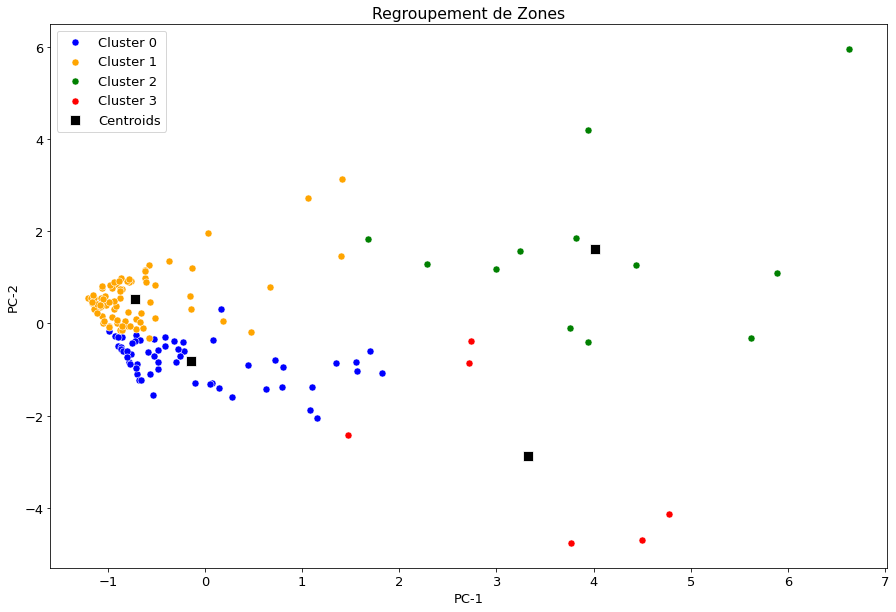

In [217]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(reference)
#Visualising the clusters
plt.figure(figsize=(15,10))
sns.scatterplot(reference[y_kmeans == 0, 0], reference[y_kmeans == 0, 1], color = 'blue', label = 'Cluster 0',s=50)
sns.scatterplot(reference[y_kmeans == 1, 0], reference[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 1',s=50)
sns.scatterplot(reference[y_kmeans == 2, 0], reference[y_kmeans == 2, 1], color = 'green', label = 'Cluster 2',s=50)
sns.scatterplot(reference[y_kmeans == 3, 0], reference[y_kmeans == 3, 1], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Regroupement de Zones')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()

### DBSCAN : L'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
L’ algorithme DBSCAN est le méthode de clustering par densité. Il construit l’ensemble des points atteignables par densité depuis chacun de points qu’il analyse.  

In [218]:
#Importer la relevante librairie
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')
#Définir le 'coord'
coord = acp.fit_transform(Z)

In [219]:
#Prendre un point x qui n’a pas été visité, 
dbs = DBSCAN(eps=0.6, min_samples=5).fit(coord)#Construire N = voisinage(eps, x)
dbs.labels_

array([ 0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,
        0, -1, -1,  0, -1,  0])

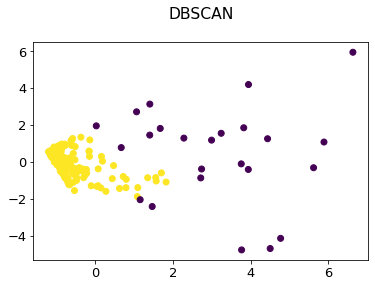

In [220]:
#Plotter des points
x = [i[0] for i in coord]
y = [i[1] for i in coord]
plt.scatter(x,y,c=dbs.labels_)
plt.title('DBSCAN\n')
plt.show()

## Scalarisation et regroupement des groupes 

In [221]:
#Importer des relevantes librairies
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Coefficient multiplicateur
scaler= MinMaxScaler(feature_range=(0,10))
print(scaler)

MinMaxScaler(feature_range=(0, 10))


In [222]:
#Afficher le dataframe
df

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
Zone,,,,,,,
Afghanistan,0.54,5.700000e+07,0.0,29000000.0,2000000.0,0.0,37171921.0
Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,83000000.0,0.0,57792518.0
Albanie,6.26,4.700000e+07,0.0,38000000.0,0.0,4000000.0,2882740.0
Algérie,1.97,2.770000e+08,0.0,2000000.0,13000000.0,0.0,42228408.0
Angola,3.60,3.190000e+08,0.0,277000000.0,2000000.0,0.0,30809787.0
...,...,...,...,...,...,...,...
Égypte,4.51,1.250000e+09,1000000.0,110000000.0,0.0,-23000000.0,98423598.0
Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,0.0,-26000000.0,9630959.0
Équateur,6.15,3.410000e+08,0.0,0.0,17000000.0,-1000000.0,17084358.0


In [223]:
#Instancier et scaler des données
data = df
scaler.fit_transform(data)
print(scaler.fit_transform(data))

[[2.28937729e-01 1.25109745e-01 0.00000000e+00 ... 1.76991150e-01
  2.76527331e+00 1.38703173e+00]
 [6.44230769e+00 4.64881475e+00 4.44287729e-01 ... 7.34513274e+00
  2.76527331e+00 2.15755498e+00]
 [2.84798535e+00 1.03160667e-01 0.00000000e+00 ... 0.00000000e+00
  2.89389068e+00 1.05758877e-01]
 ...
 [2.79761905e+00 7.48463565e-01 0.00000000e+00 ... 1.50442478e+00
  2.73311897e+00 6.36426194e-01]
 [0.00000000e+00 3.07287094e-02 0.00000000e+00 ... 8.84955752e-02
  2.76527331e+00 4.07939419e+00]
 [6.73076923e-01 6.58472344e-03 0.00000000e+00 ... 0.00000000e+00
  2.86173633e+00 2.24355526e-02]]


In [224]:
print(scaler.data_max_)

[2.18800000e+01 4.55600000e+09 1.41800000e+09 6.08000000e+08
 1.13000000e+08 2.25000000e+08 2.67670543e+08]


In [225]:
#Afficher les données transformées
data2=scaler.transform(data)
data2=pd.DataFrame(data2,columns=df.columns,index=df.index)
data2

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
Zone,,,,,,,
Afghanistan,0.228938,0.125110,0.000000,0.476974,0.176991,2.765273,1.387032
Afrique du Sud,6.442308,4.648815,0.444288,8.453947,7.345133,2.765273,2.157555
Albanie,2.847985,0.103161,0.000000,0.625000,0.000000,2.893891,0.105759
Algérie,0.883700,0.607989,0.000000,0.032895,1.150442,2.765273,1.575976
Angola,1.630037,0.700176,0.000000,4.555921,0.176991,2.765273,1.149300
...,...,...,...,...,...,...,...
Égypte,2.046703,2.743635,0.007052,1.809211,0.000000,2.025723,3.675804
Émirats arabes unis,6.758242,0.904302,0.662906,7.121711,0.000000,1.929260,0.357917
Équateur,2.797619,0.748464,0.000000,0.000000,1.504425,2.733119,0.636426


In [226]:
#Utiliser AgglomerativeClustering pour determiner le contenu des clusters.
agg_clustering = AgglomerativeClustering(n_clusters=4)
#Appliquer l'algorithme sur des données
agg_clustering.fit(data2)

AgglomerativeClustering(n_clusters=4)

In [227]:
#Mettre en clusters et labels
data2['label'] = agg_clustering.labels_

In [228]:
#Afficher le dataframe
data2

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population,label
Zone,,,,,,,,
Afghanistan,0.228938,0.125110,0.000000,0.476974,0.176991,2.765273,1.387032,0
Afrique du Sud,6.442308,4.648815,0.444288,8.453947,7.345133,2.765273,2.157555,1
Albanie,2.847985,0.103161,0.000000,0.625000,0.000000,2.893891,0.105759,2
Algérie,0.883700,0.607989,0.000000,0.032895,1.150442,2.765273,1.575976,0
Angola,1.630037,0.700176,0.000000,4.555921,0.176991,2.765273,1.149300,3
...,...,...,...,...,...,...,...,...
Égypte,2.046703,2.743635,0.007052,1.809211,0.000000,2.025723,3.675804,0
Émirats arabes unis,6.758242,0.904302,0.662906,7.121711,0.000000,1.929260,0.357917,3
Équateur,2.797619,0.748464,0.000000,0.000000,1.504425,2.733119,0.636426,2


### Les listes des 4 groupes sélectionnés après la scalarisation

In [229]:
#Imprimer les noms du clusters, boucle à travers les clusters de 0 à 4
for i in range (4):
    print(f'Cluster {i}')
    # Sélectionner les index du DataFrame 'X_scaled' où la colonne 'label' est égale à 'i' et les imprime sous forme de liste
    print(data2[data2.label == i].index.tolist())
    print() # Imprimer une ligne vide pour la lisibilité

Cluster 0
['Afghanistan', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', 'Croatie', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Fédération de Russie', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', "Iran (République islamique d')", 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Slovaquie', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Thaïlande', 'Timor-Leste', 'Togo', 'Turkménistan', 'Uruguay', 'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Éthiopie', 'Îles Salomon']

Cluster 1
['Afrique du Sud', 'Argentine', 'Colombie', 'Espagne', 'Indonésie',

In [230]:
#Comprendre la caracterisation des clusters
data2_label=data2.groupby(['label']).mean()
data2_label

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
label,,,,,,,
0,0.939289,0.431471,0.114818,0.317897,0.193584,2.772809,1.003629
1,3.901557,3.696005,0.377292,2.333882,6.530973,3.115756,3.607064
2,4.526604,0.513665,0.217793,0.774735,0.124124,3.302710,0.355281
3,3.703640,1.342186,3.256347,6.165707,0.376106,3.942926,1.033407


In [231]:
#Afficher des colonnes
data2.columns

Index(['Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Pertes', 'Variation de stock', 'Population',
       'label'],
      dtype='object')

### La distribution des données de 4 groupes sélectionnés après scalarisation

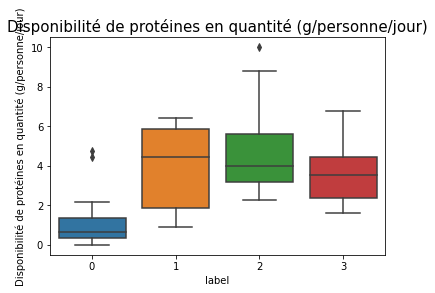

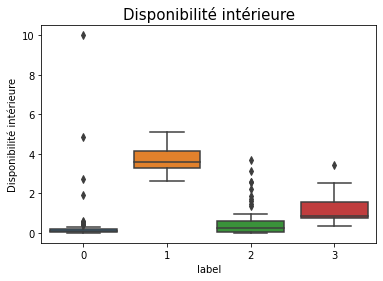

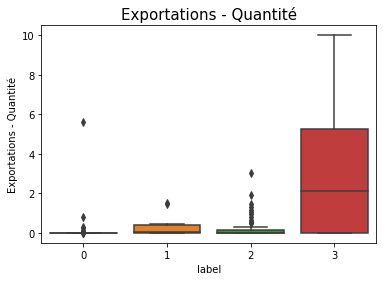

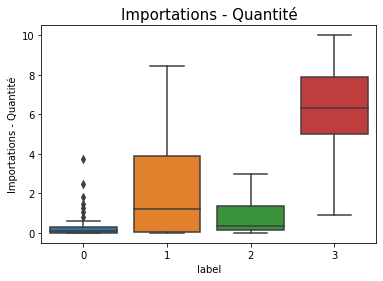

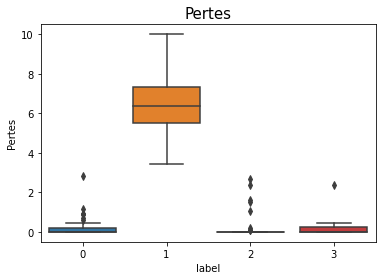

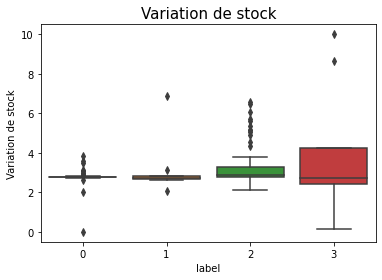

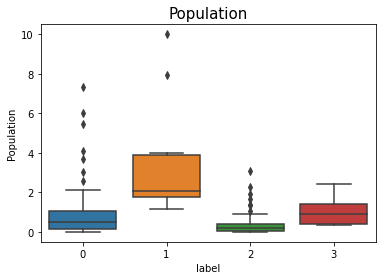

In [232]:
#Faire de boîte aux moustaches pour des clusters
plt.rcParams.update({'font.size':10})
liste_col = list(data2.columns)
for i in liste_col[:-1]:
    sns.boxplot(data=data2,x='label',y=i);
    plt.title(i, fontsize=15)
    plt.show()

### La comparaison des 4 groupes sélectionnés après scalarisation
Le radar visualization permet la comparaison des 4 groupes sur le radar en regardant des variables initiales.

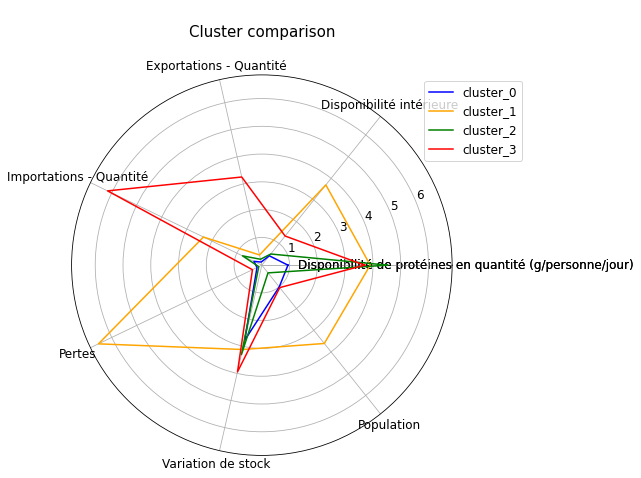

In [233]:
#Radar visualization
plt.rcParams.update({'font.size':12})
categories = list(data2_label.columns)
categories = [*categories, categories[0]] #to close the radar, duplicate the first column
n_points = len(categories)

label_0 = np.array(data2_label)[0]
label_0 = [*label_0, label_0[0]]
label_1 = np.array(data2_label)[1]
label_1 = [*label_1, label_1[0]]
label_2 = np.array(data2_label)[2]
label_2 = [*label_2, label_2[0]]
label_3 = np.array(data2_label)[3]
label_3 = [*label_3, label_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(label_0))

plt.figure(figsize=(7, 7))
plt.subplot(polar=True)
plt.plot(label_loc, label_0, label='cluster_0',c='blue')
plt.plot(label_loc, label_1, label='cluster_1',c='orange')
plt.plot(label_loc, label_2, label='cluster_2',c='green')
plt.plot(label_loc, label_3, label='cluster_3',c='red')

plt.title('\nCluster comparison\n', size=15)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Mission 2: Approfondir l'étude de marché. 

## 1. L'Analyse Composante Principale (l'ACP )
L’ACP permet d’étudier les variabilités entre les individus (les differences et les resemblances) et les liaisons entre les variables en regroupant des variables en nouvelles  variables synthétiques.

In [234]:
#Importer des relevantes librairies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

#Instancier l'ACP
pca = PCA()

In [235]:
#Spécifier le nombre de composantes principales souhaitées 
Z = pca.fit_transform(X_standardized)

In [236]:
#Nombre de composantes calculées
print(pca.n_components_)

7


In [237]:
#Les variances expliquées
print(pca.explained_variance_)

[2.48998454 1.50361565 0.99553961 0.90246594 0.50173337 0.4193051
 0.23165958]


In [238]:
#Pourcentage des variances expliquées
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.35347489 0.21345128 0.14132548 0.12811287 0.0712254  0.05952399
 0.03288609]
0.9999999999999999


In [239]:
#Calculer les variances et les valeurs de scree 
scree=(pca.explained_variance_ratio_*100).round(2)
scree

array([35.35, 21.35, 14.13, 12.81,  7.12,  5.95,  3.29])

In [240]:
#Des sommes des variances cumuléés
scree_cum=scree.cumsum().round()
scree_cum

array([ 35.,  57.,  71.,  84.,  91.,  97., 100.])

In [241]:
#Obtenir les valeurs propres et les vecteurs propres
val = acp.explained_variance_
print('\n Affichage de val')
print(val)
vect = acp.components_
print('\n Affichage de vect')
print(vect)


 Affichage de val
[2.48998454 1.50361565]

 Affichage de vect
[[1. 0.]
 [0. 1.]]


In [242]:
#Scree plot pour choisir le nombre de composantes principales qui explique un pourcentage de la variance
def display_scree_plot (pca):
    scree = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len (scree))+1, scree.cumsum(), c="red", marker="o")
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=True)

Nombre de composantes calculées :  7


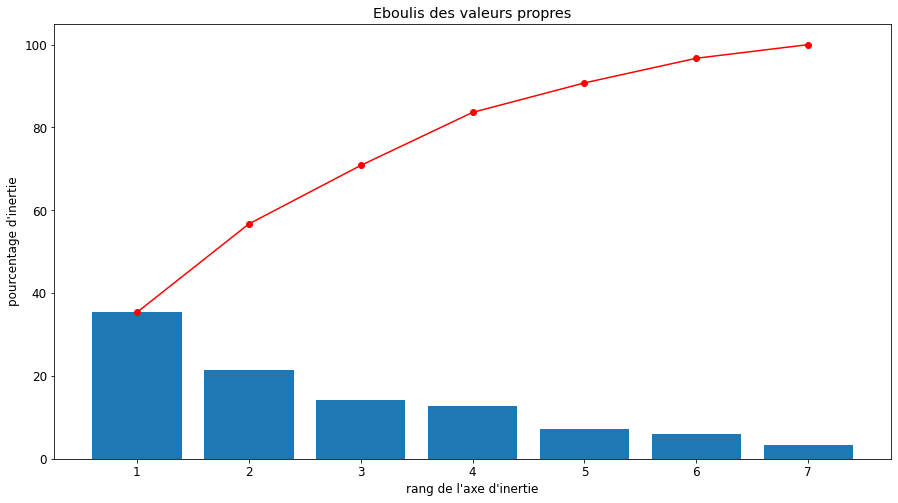

In [243]:
#Choisir le nombre de composantes principales à calculer vu qu'on a sept paramètres
n_comp=7
# Calculer des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_standardized)
print ('Nombre de composantes calculées : ', pca.n_components_)
# Eboulis des valeurs propres
plt.figure(figsize = ( 15, 8))
display_scree_plot(pca)

In [244]:
#Extraire des eigenvalues et des proportions de la variance expliqué pour un scree plot
eigenvalues = pca.explained_variance_
prop_var= eigenvalues/np.sum(eigenvalues)
prop_var

array([0.35347489, 0.21345128, 0.14132548, 0.12811287, 0.0712254 ,
       0.05952399, 0.03288609])

In [245]:
#Création d'un dataframe 'eig' contenant des détails sur les composantes principales 
#issues de 'pca' et affichage du dataframe.
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.489985,35.0,35.0
1,Dim2,1.503616,21.0,57.0
2,Dim3,0.995540,14.0,71.0
3,Dim4,0.902466,13.0,84.0
4,Dim5,0.501733,7.0,91.0
5,Dim6,0.419305,6.0,97.0
6,Dim7,0.231660,3.0,100.0


In [246]:
#Importer des relevantes librairies
import matplotlib.pyplot as plt
from sklearn import decomposition 

#Fixer les nombres des composantes principales souhaitées
pca=decomposition.PCA(n_components=4)

In [247]:
#Instancier
pca.fit(X_standardized)

PCA(n_components=4)

In [248]:
#Des valeurs des variances expliquées
print(pca.explained_variance_ratio_)

[0.35347489 0.21345128 0.14132548 0.12811287]


In [249]:
#Des sommes des variances cumuléés
print(pca.explained_variance_ratio_.cumsum())

[0.35347489 0.56692617 0.70825165 0.83636452]


In [250]:
#Projeter X sur les composantes principales
X_projected = pca.transform(X_standardized)
print(X_projected.shape)

(159, 4)


In [251]:
#Mettre des composantes principales en dataframe
X_proj=pd.DataFrame(X_projected,index=Zone,columns=["F"+str(i+1) for i in range(4)])
X_proj

,F1,F2,F3,F4
Zone,,,,
Afghanistan,-0.616143,0.980480,0.676577,0.546515
Afrique du Sud,5.620131,-0.307820,0.156428,-2.752870
Albanie,-0.845609,-0.087740,0.002433,-0.115654
Algérie,-0.137790,1.199849,0.207147,0.390442
Angola,0.473278,-0.190191,1.445990,-0.493172
...,...,...,...,...
Égypte,1.403549,1.461635,0.804906,-0.534212
Émirats arabes unis,1.157132,-2.039225,1.479214,-2.594362
Équateur,-0.157301,0.584829,-0.368107,-0.193590


In [252]:
#Des valeurs de F1
F1=pca.components_[0]
print(F1)

[0.14419833 0.56239531 0.31427179 0.35005956 0.46171796 0.18104923
 0.4423207 ]


In [253]:
#Des valeurs de F2
F2=pca.components_[1]
print(F2)

[-0.48185425  0.1018596  -0.4377343  -0.35525131  0.29321307 -0.37037432
  0.46526902]


In [254]:
#Des valeurs de F3
F3=pca.components_[2]
print(F3)

[-0.54325315 -0.13170768  0.43776508  0.49511429 -0.25751834 -0.42136969
  0.08297323]


In [255]:
#Des valeurs de F4
F4=pca.components_[3]
print(F4)

[-0.53297665 -0.09558713  0.24422725 -0.27323191 -0.098423    0.73721916
  0.13898628]


In [256]:
#Calculer des données par l'attribut 'components_' et nommée 'pcs'
pcs=pca.components_
pcs

array([[ 0.14419833,  0.56239531,  0.31427179,  0.35005956,  0.46171796,
         0.18104923,  0.4423207 ],
       [-0.48185425,  0.1018596 , -0.4377343 , -0.35525131,  0.29321307,
        -0.37037432,  0.46526902],
       [-0.54325315, -0.13170768,  0.43776508,  0.49511429, -0.25751834,
        -0.42136969,  0.08297323],
       [-0.53297665, -0.09558713,  0.24422725, -0.27323191, -0.098423  ,
         0.73721916,  0.13898628]])

In [257]:
#Afficher les variables 'pcs' en datataframe 
pcs=pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.144198,0.562395,0.314272,0.350060,0.461718,0.181049,0.442321
1,-0.481854,0.101860,-0.437734,-0.355251,0.293213,-0.370374,0.465269
2,-0.543253,-0.131708,0.437765,0.495114,-0.257518,-0.421370,0.082973
3,-0.532977,-0.095587,0.244227,-0.273232,-0.098423,0.737219,0.138986


In [258]:
#Définir une variable avec la liste des composantes
n_components=4
X_list=range(1,n_components+1)
list(X_list)

[1, 2, 3, 4]

In [259]:
#Nommée les colonnes
pcs.columns=features
pcs.index=[f"F{i}" for i in X_list]
pcs.round(2)

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
F1,0.14,0.56,0.31,0.35,0.46,0.18,0.44
F2,-0.48,0.10,-0.44,-0.36,0.29,-0.37,0.47
F3,-0.54,-0.13,0.44,0.50,-0.26,-0.42,0.08
F4,-0.53,-0.10,0.24,-0.27,-0.10,0.74,0.14


In [260]:
#Transposer le dataframe
pcs.T

,F1,F2,F3,F4
Disponibilité de protéines en quantité (g/personne/jour),0.144198,-0.481854,-0.543253,-0.532977
Disponibilité intérieure,0.562395,0.101860,-0.131708,-0.095587
Exportations - Quantité,0.314272,-0.437734,0.437765,0.244227
Importations - Quantité,0.350060,-0.355251,0.495114,-0.273232
Pertes,0.461718,0.293213,-0.257518,-0.098423
Variation de stock,0.181049,-0.370374,-0.421370,0.737219
Population,0.442321,0.465269,0.082973,0.138986


### La matrice de corrélation des composantes principales et des variables d'origin

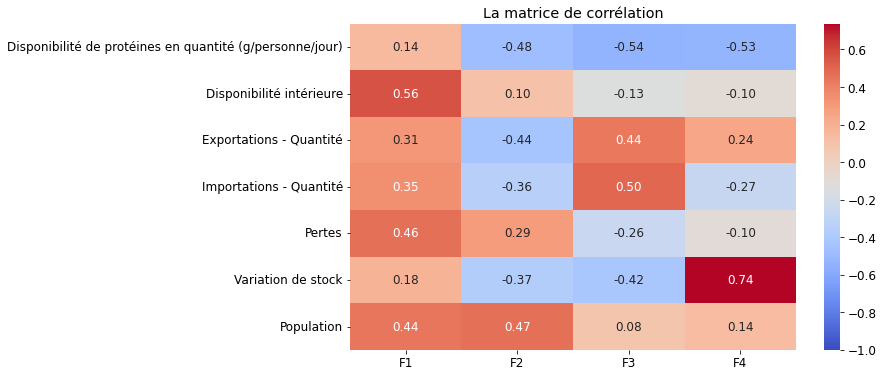

In [261]:
#Rendre la représentation plus visuelle avec la corrélation matrice
plt.rcParams.update({'font.size':12})
Fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pcs.T,vmin=-1,annot=True,cmap='coolwarm',fmt='0.2f')
plt.title("La matrice de corrélation")
plt.show()

## 2. Comprendre les groupes, les liens entre les variables, et les liens entre les individus.

### Le graphique de cercle des corrélations

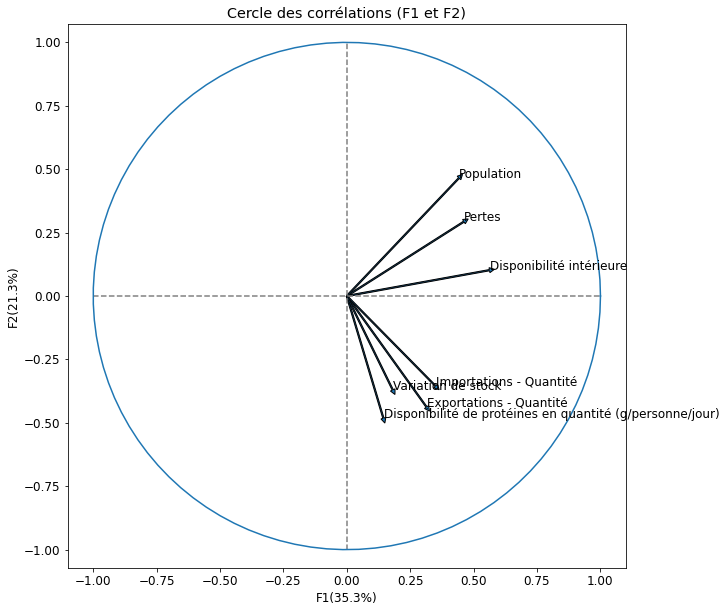

In [262]:
#Définir nos axes x et y en utilisant les 2 premier composantes
x,y=0,1
#Pour la partie de graphique
plt.rcParams.update({'font.size':12})
fig,ax=plt.subplots(figsize=(10,10))
for i in range (0,pca.components_.shape[1]):
    ax.arrow(0,
             0, #start the arrow at the origin
            pca.components_[0,i], #0 for PC1
            pca.components_[1,i], #1 for PC2
            head_width = 0.02,
            head_length = 0.02,
            width = 0.005)
#labels
    plt.text(pca.components_[0,i]+ 0.001,
             pca.components_[1,i]+ 0.001,
            features[i])
#Afficher des lignes horizontal et verticales
plt.plot([-1,1],[0,0], color='grey',ls='--')
plt.plot([0,0],[-1,1], color='grey',ls='--')

#Noms des axes avec le pourcentage d'inertie expliqué
plt.xlabel('F{}({}%)'.format(x+1,round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{}({}%)'.format(y+1,round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Cercle des corrélations (F{} et F{})".format(x+1,y+1))

an=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(an),np.sin(an)) #Add a unit circle for scale
plt.axis('equal')
plt.savefig("Cercle des corrélations")
plt.show(block=False)

### Comprendre les liens entre les variables : 
L’axe des abscisses représente le premier axe d'inertie, F1 alors que l’axe des ordonnées représente F2.
Les axes principaux d’inertie peuvent être vues comme des « nouvelles variables » qui synthétisent des variables déjà existantes.

#### Composante Principale 1 (F1)    
FI explique une grande partie de 35,3% de la variance totale du jeu de données.

Les variables initiales telles que la disponibilité intérieure, les pertes,et la population sont corrélées positivement au F1 avec la disponibilité intérieur la plus fortement corrélée. 
- La disponibilté intérieur indique la disponibilité alimentaire de part de 'viande de volailles' dans l'intérieur des pays. Cette variable est la plus fortement corélée à F1 ainsi de contribuer positivement à F1.
- Les pertes représente les gaspillages alimentaires qui vient de part de 'viande de volailles'. Elle est corrèle positivement à F1.
- La population est un ensemble des habitats d'un pays. Elle est positivement corrélée à F1.

Ce qui est intéressant à l'interprétation de l’axe F1; c'est que toutes ces variables ont unit par une notion de l'availabilité de 'viande de volailles' dans un pays.


#### Composante Principale 2 (F2)   
F2 explique également une partie significative de la variance totale du jeu de données, à peu près 21%.

Les variables initiales comme l'importations-quantité, l'exportations-quantité, les variation de stock, et la disponibilité de protéines en quantité (g/personne/jour) sont corrélées négativement au F2 avec la dernière variable la plus fortement corrélée. 
- L'importations-quantité est la quantité de 'viande de volailles' importé par un pays. Cette variable est négativement corrélée à F2.
- L'exportations-quantité est la quantité de 'viande de volailles' exporté par un pays. Elle est corrèle négativement à F2. 
- Les variation de stock mesure la différence entre la disponibilité intérieur, la production, et les importations en ajoutant les exportations.  Cette variable est négativement corrélée à F2.
- La disponibilité de protéines en quantité (g/personne/jour) mesure la disponibilité de protéines en gram par personne par jour de part de 'viande des volailles'. Elle est négativement corrélée à F2 aussi la plus fortement corrélée.

Ce qui est intéressant à l'interprétation de l’axe F2; c'est que toutes ces variables ont unit par une notion de la qualité de 'viande de volailles' dans un pays.

En résumant des variables en nouvelles dimensions F1 et F2, parfois même F3 et F4. Les composantes principales peuvent être vues comme de nouvelles variables et de nouvelles colonnes de notre tableau de données.


### La représentaion des individus sur le plan factorielle

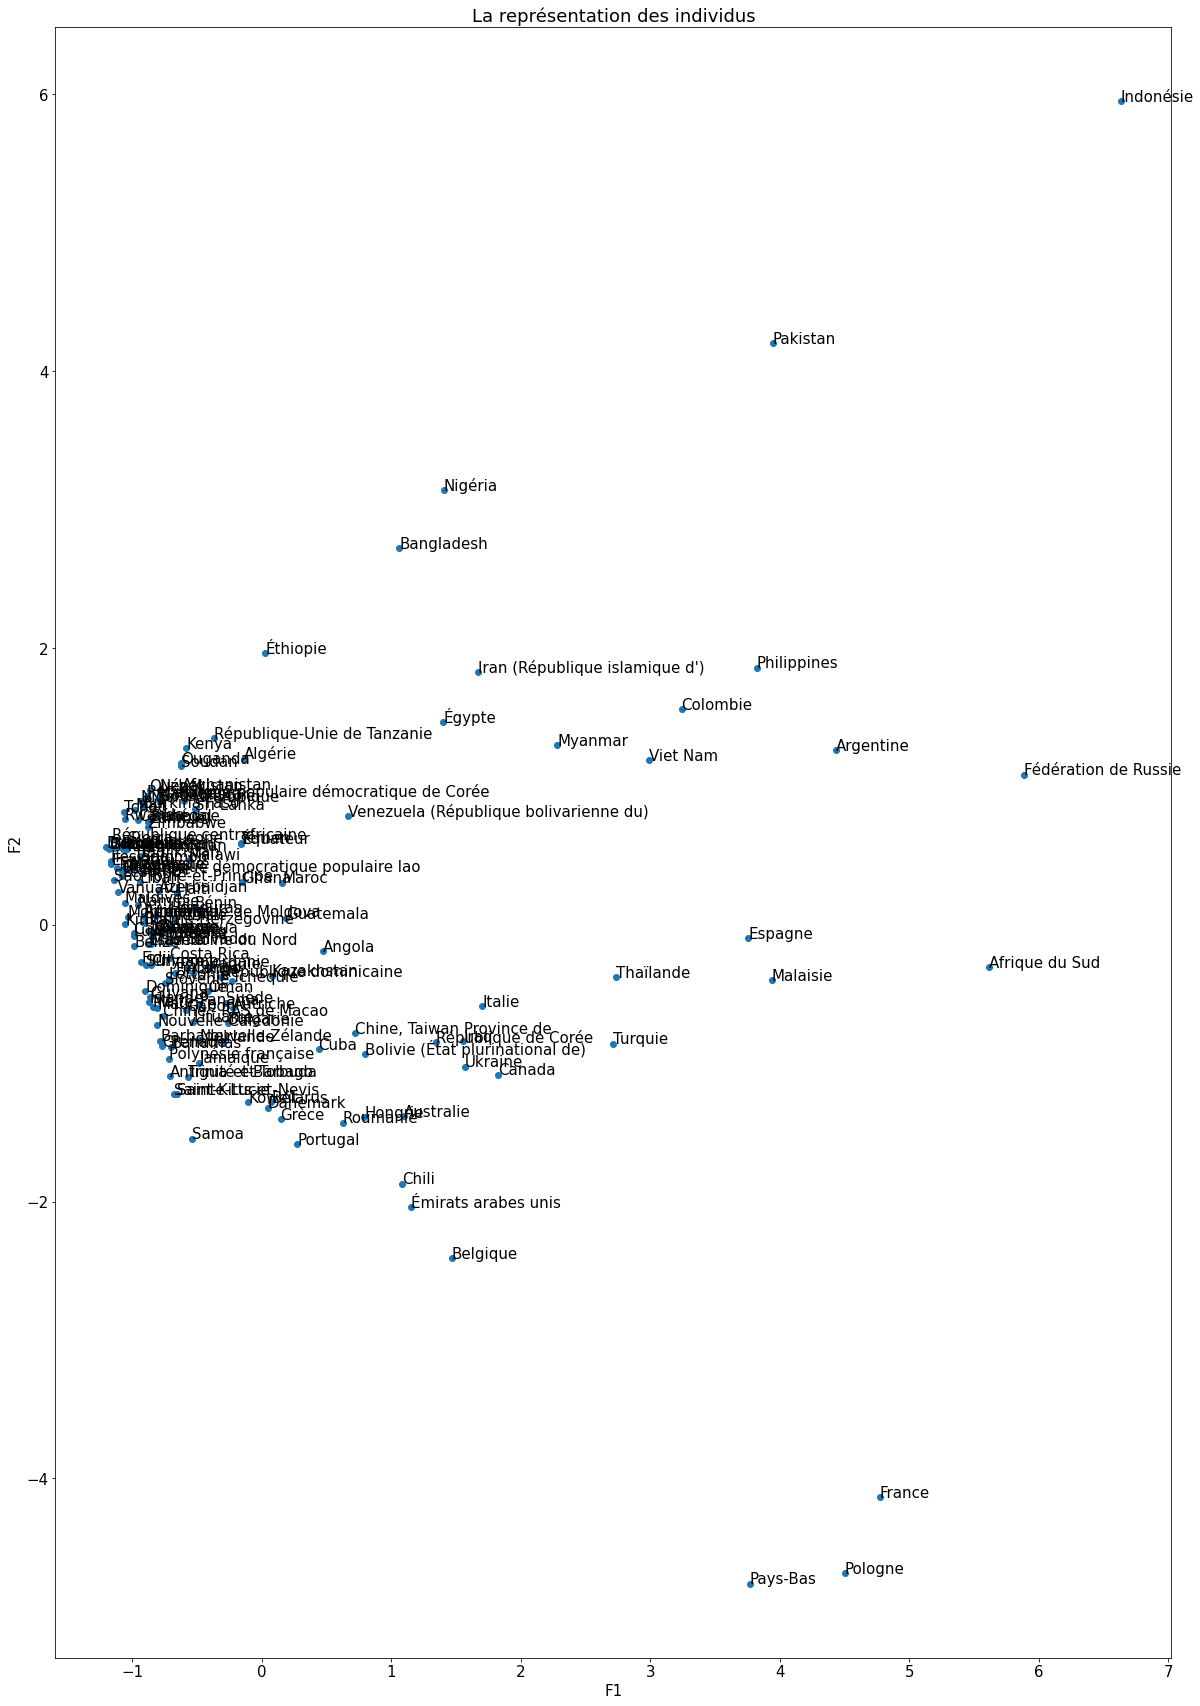

In [263]:
#Afficher chaque observation
plt.rcParams.update({'font.size':15})
fig=plt.figure(figsize=(20,30))
plt.scatter(X_projected[:, 0],X_projected[:,1])
for i, (x,y)in enumerate (zip (X_projected[:,0],
                               X_projected[:,1])):
    plt.text(x,y,df.index[i])
plt.xlabel('F1')
plt.ylabel('F2')
plt.title("La représentation des individus")
plt.show()

### Comprendre les liens entre les individus
#### Ce qui les différencie, et ce qui fait qu’ils sont semblables, il faut interpréter ce graphique en parallèle du cercle des corrélations.

Qu’est-ce qui différencie les individus qui ont une abscisse grande de ceux qui en ont une petite?
- Les pays avec des grandes abscisses tels que l'Indonesie sont très peuplés avec beaucoup de disponibilité intérieure et beaucoup de pertes. En revanche les pays ont des petites abscisses sont moins peuplés, moins des pertes, et moins de disponibilité intérieure comme la Vanuatu, l'Azerbaïdjan.

Qu’est-ce qui différencie deux individus qui ont à peu près la même abscisse, mais des ordonnées très différentes? 
- Les pays avec à peu près la même abscisses mais des ordonnées très différentes ont beaucoup de disponibilité de protéines en quantité comme la France, les Pays-Bas.

En résumé, c'est difficile de rendre compte de la complexité de la réalité des individus car des distances entre les individus sont considérées. Donc, deux individus qui sont proches dans l'espace sont similaires et s’ils sont éloignés sont différents.

### Les résultats et recommendations
Le cluster 1 ('Afrique du Sud', 'Argentine', 'Colombie', 'Espagne', 'Indonésie', 'Malaisie', 'Myanmar', 'Pakistan', 'Philippines', 'Viet Nam') est choisi basé sur les critères suivantes : 
- L’availabilité - Les pays avec beaucoup de disponibilité intérieur, population, et pertes,
- L’qualité – Les pays avec beaucoup de la disponibilité de proteins en quantité mais un peu de population,
- L’économie – Les pays ayants des ressources avec le pouvoir d'achat pour acheter des poulets, 
- La politique – Les pays avec la stabilité du gouvernement,
- La proximité géographique – Les pays qui sont situent en Europe.

Pour alimenter l’analyse, ces critères sera peaufinés en échangeant avec des experts.